In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [169]:
x = np.linspace(start= -3, stop = 3, num=100)

## $$f(x) = x^2+2x$$

In [170]:
def f(x):
    return x**2+2*x

In [171]:
def df(x):
    return 2*x+2


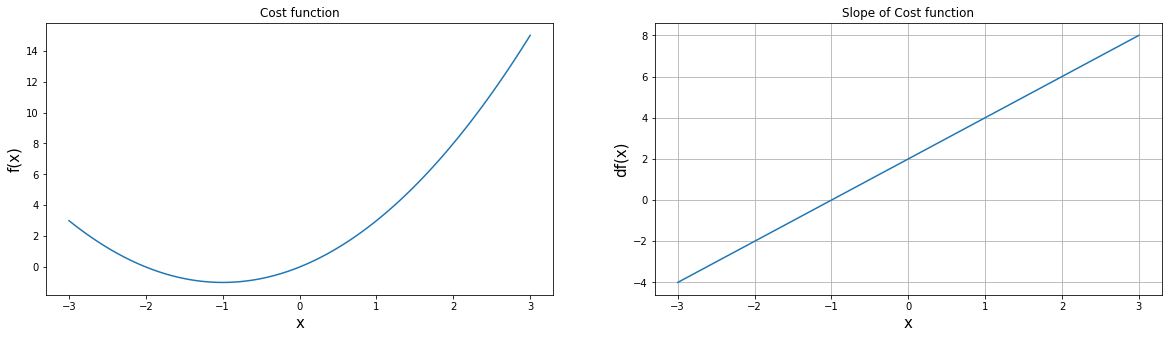

In [172]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.plot(x,f(x))
plt.title('Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.subplot(1,2,2)
plt.plot(x,df(x))
plt.title('Slope of Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('df(x)', fontsize=15)
plt.grid()

plt.show()

# Gradient Descent

In [173]:
prev_x = 0
new_x = -2 #it's a random starting point 
step_multiplier = 0.1
new_x_list = [new_x]
precision = 0.0001
step_size = 1
counter = 0

while step_size > precision:
    prev_x = new_x
    new_x = prev_x - step_multiplier * df(prev_x)
    step_size = abs(new_x - prev_x)
    new_x_list.append(new_x)
    counter += 1
print('function has local minima as x =',round(new_x_list[-1])  )  
    
    
    
    
    

function has local minima as x = -1


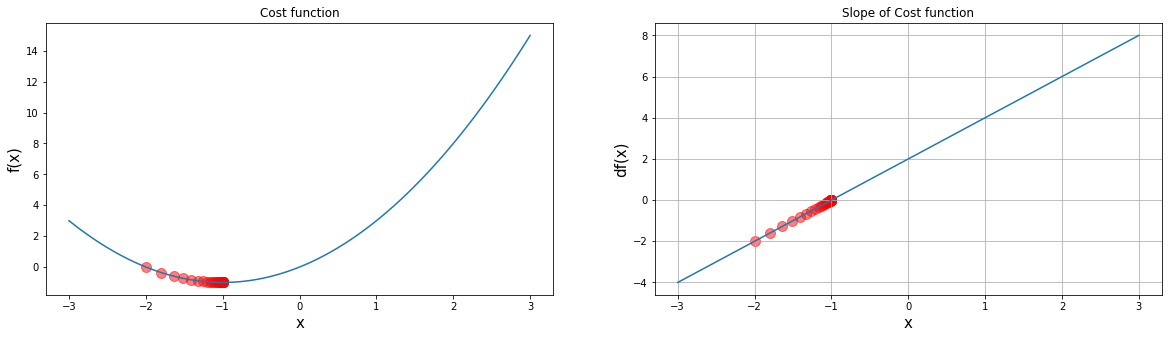

In [174]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(x,f(x))
plt.title('Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.scatter(np.array(new_x_list), f(np.array(new_x_list)), color='red', alpha=0.5, s= 100) #alpha for transparency

plt.subplot(1,2,2)
plt.plot(x,df(x))
plt.title('Slope of Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('df(x)', fontsize=15)
plt.scatter(np.array(new_x_list), df(np.array(new_x_list)), color='red', alpha=0.5, s= 100) #alpha for transparency

plt.grid()

plt.show()



# functions with multiple local minima

In [175]:
x_1 = np.linspace(start=-2, stop=2, num=1000)


## $$g(x) = x^4-4x^2+5$$

In [176]:
def g(x):
    return x**4-4*x**2+5

def dg(x):
    return 4*x**3-8*x

# Gradient descent as a python function

In [177]:
def gradient_descent(derivative_func, initial_guess=1, multiplier=0.1, precision=0.0001, max_iter=200):
    
    prev_x = 0
    new_x = initial_guess #it's a random starting point 
    new_x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = 1
    counter = 0

    while counter < max_iter and step_size > precision:
        prev_x = new_x
        new_x = prev_x - multiplier * derivative_func(prev_x)
        new_x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        step_size = abs(new_x - prev_x)
        counter += 1
        
    return new_x, new_x_list, slope_list
 
    

In [185]:
# calling the gradient descent function

local_min, x_list, deriv_list = gradient_descent(dg, initial_guess=1, multiplier=0.01, precision=0.001, max_iter=30)



# plotting cost function $g(x)$ and derivative function

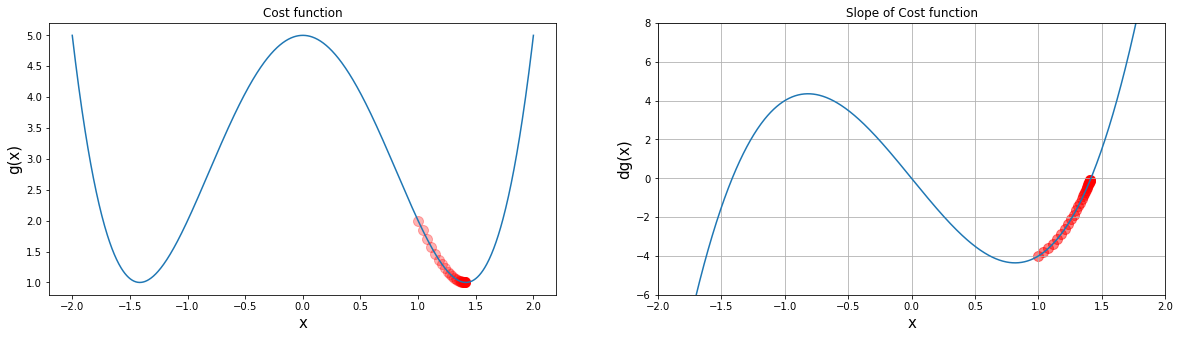

In [186]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(x_1,g(x_1))
plt.title('Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('g(x)', fontsize=15)
plt.scatter(np.array(x_list), g(np.array(x_list)), color='red', alpha=0.3, s= 100) #alpha for transparency

plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_1,dg(x_1))
plt.title('Slope of Cost function')
plt.xlabel('x', fontsize=15)
plt.ylabel('dg(x)', fontsize=15)
plt.scatter(x_list, deriv_list, color='red', alpha=0.5, s= 100) #alpha for transparency

plt.grid()

plt.show()


In [180]:
len(x_list)

25

## Effect of learning rate (or multiplier) on cost function

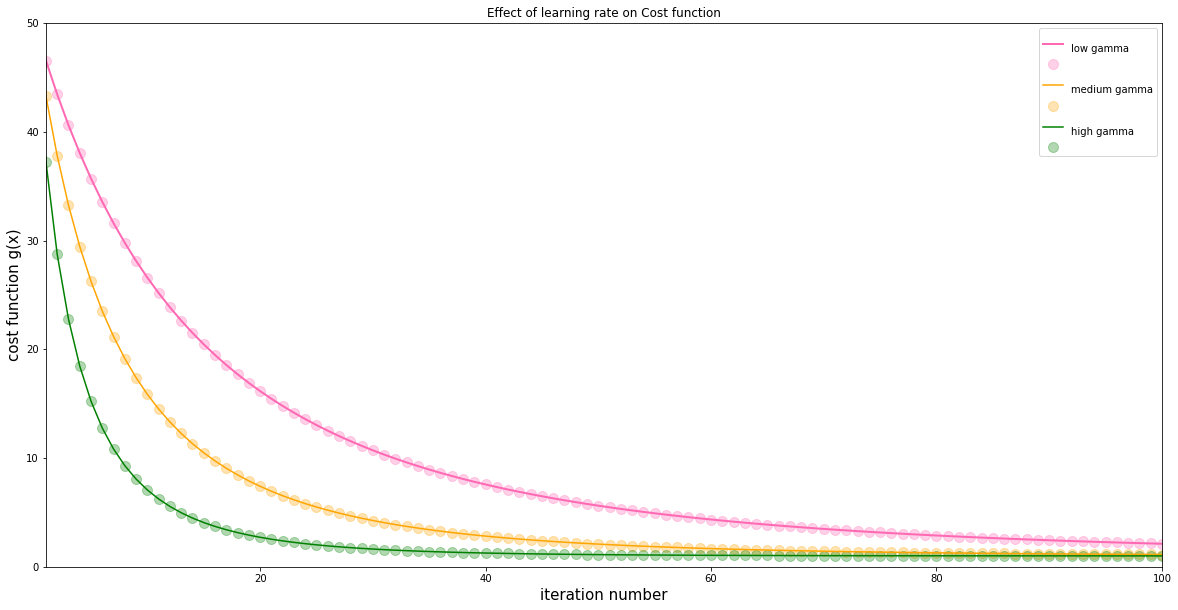

In [208]:
n = 100

# lets get the values for plots

# x-axis data
iteration_list = np.array(list(range(0,n+1,1)))

# y-axis data
# gamma means learning rate , low gamma means when multiplier or learning rate is small say 0.005
low_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
medium_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# plotting the cost function g(x) vs iteration number
plt.figure(figsize=[20,10])
plt.xlim(1,n)
plt.ylim(0, 50)

plt.title('Effect of learning rate on Cost function')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('cost function g(x)', fontsize=15)

low_plot = plt.plot(iteration_list, g(np.array(low_gamma[1])), color='hotpink', linewidth=2)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), color='hotpink', alpha=0.3, s= 100)

med_plot = plt.plot(iteration_list, g(np.array(medium_gamma[1])), color='orange')
plt.scatter(iteration_list, g(np.array(medium_gamma[1])), color='orange', alpha=0.3, s= 100)

high_plot = plt.plot(iteration_list, g(np.array(high_gamma[1])), color='green')
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='green', alpha=0.3, s= 100)

plt.legend(['\nlow gamma','', '\nmedium gamma' , '','\nhigh gamma','' ])         

In [ ]:
# but using a very high gamma or learning rate or multiplier, can lead to non convergence to a minimum as cost ...
# function keeps on wandering between different values due to big steps.

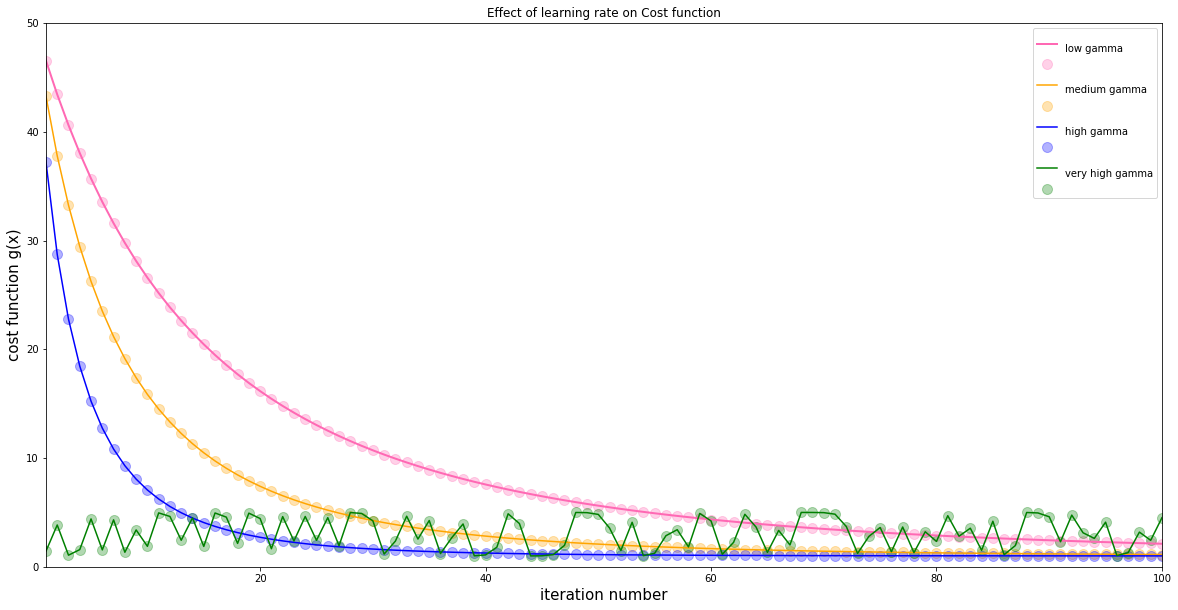

In [220]:
n = 100

# lets get the values for plots

# x-axis data
iteration_list = np.array(list(range(0,n+1,1)))

# y-axis data
# gamma means learning rate , low gamma means when multiplier or learning rate is small say 0.005
low_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
medium_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)
very_high_gamma = gradient_descent(dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# plotting the cost function g(x) vs iteration number
plt.figure(figsize=[20,10])
plt.xlim(1,n)
plt.ylim(0, 50)

plt.title('Effect of learning rate on Cost function')
plt.xlabel('iteration number', fontsize=15)
plt.ylabel('cost function g(x)', fontsize=15)

low_plot = plt.plot(iteration_list, g(np.array(low_gamma[1])), color='hotpink', linewidth=2)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), color='hotpink', alpha=0.3, s= 100)

med_plot = plt.plot(iteration_list, g(np.array(medium_gamma[1])), color='orange')
plt.scatter(iteration_list, g(np.array(medium_gamma[1])), color='orange', alpha=0.3, s= 100)

high_plot = plt.plot(iteration_list, g(np.array(high_gamma[1])), color='blue')
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='blue', alpha=0.3, s= 100)

very_high_plot = plt.plot(iteration_list, g(np.array(very_high_gamma[1])), color='green')
plt.scatter(iteration_list, g(np.array(very_high_gamma[1])), color='green', alpha=0.3, s= 100)

plt.legend(['\nlow gamma','', '\nmedium gamma' , '','\nhigh gamma','','\nvery high gamma','' ])         

In [ ]:
# even though initial guess taken 1.9 is much closer to true minima of 1.4, very high gamma of 0.25 ...
# ends up leading to higher cost function than lower learning rates as evident from above chart.